### Implement simpliest NN Architecture for Titanic Dataset

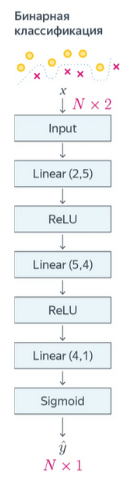

### Write Network class

In [1]:
import torch

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

import pandas as pd

import matplotlib.pyplot as plt

import warnings
from tqdm import tqdm

warnings.filterwarnings('ignore')

/tmp/ipykernel_14471/3081144206.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
class SimpleNeuro(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.net = torch.nn.Sequential(
            torch.nn.Linear(input_size, hidden_size),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_size, int(hidden_size // 2)),
            torch.nn.ReLU(),
            torch.nn.Linear(int(hidden_size // 2), 1),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        pred = self.net(x)
        return torch.tensor([float(x > 0.5) for x in pred], requires_grad=True)

### Load & Code Titanic data

In [3]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
data['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [6]:
data.drop(['Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)

In [7]:
data_cat = data.select_dtypes('object')
data_cat

,Sex,Cabin,Embarked
0,male,NaN,Q
1,female,NaN,S
2,male,NaN,Q
3,male,NaN,S
4,female,NaN,S
...,...,...,...
413,male,NaN,S
414,female,C105,C
415,male,NaN,S
416,male,NaN,S


In [8]:
data.drop(list(data_cat.columns), axis=1, inplace=True)

In [9]:
ohe = OneHotEncoder()
data_cat_coded = ohe.fit_transform(data_cat)
data_cat_coded = pd.DataFrame(data_cat_coded.toarray(), columns=ohe.get_feature_names_out())
data_cat_coded

,Sex_female,Sex_male,Cabin_A11,Cabin_A18,Cabin_A21,Cabin_A29,Cabin_A34,Cabin_A9,Cabin_B10,Cabin_B11,...,Cabin_F E57,Cabin_F G63,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Cabin_nan,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
414,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
415,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
416,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [10]:
data = pd.concat([data, data_cat_coded], axis=1)

In [11]:
data.shape

(418, 88)

In [12]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, data):
        self.data = data
        self.target = self.data['Survived']
        self.data.drop(['Survived'], axis=1, inplace=True)

        self.len = self.data.shape[0]
        self.data = torch.tensor(self.data.to_numpy(), dtype=torch.float)
        self.target = torch.tensor(self.target.to_numpy(), dtype=torch.float)

    def __len__(self):
        return self.len

    def __getitem__(self, index):
        return self.data[index], self.target[index]

In [13]:
data = MyDataset(data)

In [14]:
train, test = torch.utils.data.random_split(data, [0.7, 0.3])

### Setup Network

In [15]:
train_loader = torch.utils.data.DataLoader(data, 16, shuffle=True)
test_loader = torch.utils.data.DataLoader(data, 16, shuffle=False)

simple_nn = SimpleNeuro(87, 44)

simple_nn_loss = torch.nn.NLLLoss()
optimizer = torch.optim.Adagrad(simple_nn.parameters(), lr=1e-3)

scheduler = torch.optim.lr_scheduler.LinearLR(optimizer)

### Train Network

In [16]:
EPOCHS = 30
train_loss = []
test_loss = []

for epoch in range(EPOCHS):

    simple_nn.train()
    running_train_loss = []
    train_loop = tqdm(train_loader, leave=False)
    for x, targets in train_loop:
        pred = simple_nn(x).reshape(-1)
        loss = simple_nn_loss(pred, targets.long())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_train_loss.append(loss.item())
        mean_train_loss = sum(running_train_loss) / len(running_train_loss)
        
        train_loop.set_description(f'Epoch [{epoch + 1}/{EPOCHS}], train_loss = {mean_train_loss:.4f}')

    train_loss.append(mean_train_loss)

    simple_nn.eval()
    with torch.no_grad():
        running_test_loss = []
        for x, targets in test_loader:
            pred = simple_nn(x).reshape(-1)
            loss = simple_nn_loss(pred, targets.long())

            running_test_loss.append(loss.item())
            mean_test_loss = sum(running_test_loss) / len(running_test_loss)

        test_loss.append(mean_test_loss)
        print(f'Epoch [{epoch + 1}/{EPOCHS}], train_loss = {mean_train_loss:.4f}')

    scheduler.step()

Epoch [1/30], train_loss = 0.0000


Epoch [2/30], train_loss = 0.0000


Epoch [3/30], train_loss = 0.0000


Epoch [4/30], train_loss = 0.0000


Epoch [5/30], train_loss = 0.0000


Epoch [6/30], train_loss = 0.0000


Epoch [7/30], train_loss = 0.0000


Epoch [8/30], train_loss = 0.0000


Epoch [9/30], train_loss = 0.0000


Epoch [10/30], train_loss = -0.0370


Epoch [11/30], train_loss = 0.0000


Epoch [12/30], train_loss = 0.0000


Epoch [13/30], train_loss = 0.0000


Epoch [14/30], train_loss = 0.0000


Epoch [15/30], train_loss = 0.0000


Epoch [16/30], train_loss = -0.0370


Epoch [17/30], train_loss = 0.0000


Epoch [18/30], train_loss = 0.0000


Epoch [19/30], train_loss = 0.0000


Epoch [20/30], train_loss = -0.0370


Epoch [21/30], train_loss = 0.0000


Epoch [22/30], train_loss = 0.0000


Epoch [23/30], train_loss = 0.0000


Epoch [24/30], train_loss = -0.0370


Epoch [25/30], train_loss = 0.0000


Epoch [26/30], train_loss = -0.0370


Epoch [27/30], train_loss = 0.0000


Epoch [28/30], train_loss = 0.0000


Epoch [29/30], train_loss = 0.0000


Epoch [30/30], train_loss = 0.0000


### Plot results

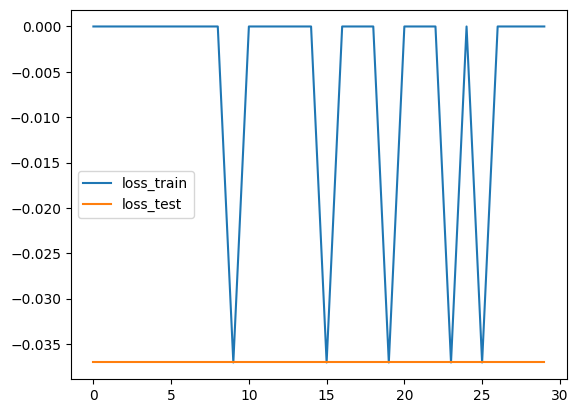

In [17]:
plt.plot(train_loss)
plt.plot(test_loss)
plt.legend(['loss_train', 'loss_test'])
plt.show()